In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
import os
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
# load dataset

#import and read json file
json_file = "static/data/ESG_Database.json"
ESG_score_df = pd.read_json(json_file)
ESG_score_df

,Company Name,HQ City,HQ State/Province,HQ Country,ESG Risk Score,ESG Risk Score Level,ESG Risk Score Percentile,Environment Risk Score,Social Risk Score,Governance Risk Score,...,Exchange,CEO,Logo Image URL,Website URL,Industry,Sector,Company Description,Latitude,Longitude,address
MMM,3M Company,Saint paul,Minnesota,United states of america,35,High,69th percentile,12.6,12.7,9.2,...,New York Stock Exchange,Inge G. Thulin,https://financialmodelingprep.com/images-New-j...,http://www.3m.com,Industrial Products,Industrials,3M Co is a diversified technology company. It ...,44.953703,-93.089958,"Saint paul,Minnesota,United states of america"
AOS,A.O. Smith Corporation,Milwaukee,Wisconsin,United states of america,25,Medium,37th percentile,13.6,4.3,7.3,...,New York Stock Exchange,None,https://financialmodelingprep.com/images-New-j...,http://www.aosmith.com,Industrial Products,Industrials,A.O. Smith Corp manufactures and markets water...,43.038902,-87.906474,"Milwaukee,Wisconsin,United states of america"
ABT,Abbott Laboratories,Abbott park,Illinois,United states of america,31,High,57th percentile,3.7,15.3,11.6,...,New York Stock Exchange,Miles D. White,https://financialmodelingprep.com/images-New-j...,http://www.abbott.com,Drug Manufacturers,Healthcare,Abbott Laboratories is a health care company t...,42.304181,-87.896392,"Abbott park,Illinois,United states of america"
ABBV,AbbVie Inc.,North chicago,Illinois,United states of america,30,High,56th percentile,1.0,16.5,12.8,...,New York Stock Exchange,Richard A. Gonzalez,https://financialmodelingprep.com/images-New-j...,http://www.abbvie.com,Drug Manufacturers,Healthcare,AbbVie Inc is a biopharmaceutical company that...,42.325578,-87.841182,"North chicago,Illinois,United states of america"
ABN.AS,ABN AMRO Bank N.V.,Amsterdam,Noord-holland,Netherlands,86,Severe,98th percentile,90.0,85.0,84.0,...,Amsterdam,None,https://financialmodelingprep.com/images-New-j...,http://www.abnamro.com,Banks—Diversified,Financial Services,ABN AMRO Bank N.V. provides various banking pr...,52.366697,4.894540,"Amsterdam,Noord-holland,Netherlands"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,Yum! Brands Inc.,Louisville,Kentucky,United states of america,20,Medium,21st percentile,4.1,10.9,5.3,...,New York Stock Exchange,Greg Creed,https://financialmodelingprep.com/images-New-j...,http://www.yum.com,Restaurants,Consumer Cyclical,Yum Brands Inc is engaged in operating quick-s...,38.252665,-85.758456,"Louisville,Kentucky,United states of america"
ZAYO,Zayo Group Holdings Inc.,Boulder,Colorado,United states of america,30,Medium,53rd percentile,8.8,12.5,8.3,...,New York Stock Exchange,Daniel P. Caruso,https://financialmodelingprep.com/images-New-j...,http://www.zayo.com,Communication Equipment,Technology,Zayo Group Holdings Inc provides fiber-based c...,40.014986,-105.270546,"Boulder,Colorado,United states of america"
Z,Zillow Group Inc.,Guernsey,Guernsey,Guernsey,30,High,55th percentile,3.3,15.8,11.1,...,Nasdaq Global Select,Spencer M. Rascoff,https://financialmodelingprep.com/images-New-j...,http://www.zillowgroup.com,Real Estate Services,Real Estate,Zillow Group Inc provides real estate and home...,33.791638,-84.389488,None
ZBH,Zimmer Biomet Holdings Inc.,Warsaw indiana,Indiana,United states of america,34,High,67th percentile,3.8,18.5,11.5,...,New York Stock Exchange,Bryan C. Hanson,https://financialmodelingprep.com/images-New-j...,http://www.zimmerbiomet.com,Medical Devices,Healthcare,Zimmer Biomet Holdings Inc is a medical device...,41.238100,-85.853047,"Warsaw indiana,Indiana,United states of america"


In [5]:
ESG_data = ESG_score_df[['ESG Risk Score','Environment Risk Score', 'Social Risk Score', 'Governance Risk Score','ESG Risk Score Level']].copy()
ESG_data

,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,ESG Risk Score Level
MMM,35,12.6,12.7,9.2,High
AOS,25,13.6,4.3,7.3,Medium
ABT,31,3.7,15.3,11.6,High
ABBV,30,1.0,16.5,12.8,High
ABN.AS,86,90.0,85.0,84.0,Severe
...,...,...,...,...,...
YUM,20,4.1,10.9,5.3,Medium
ZAYO,30,8.8,12.5,8.3,Medium
Z,30,3.3,15.8,11.1,High
ZBH,34,3.8,18.5,11.5,High


In [6]:
# shape
print(ESG_data.shape)

(724, 5)


In [7]:
# descriptions
print(ESG_data.describe())

       ESG Risk Score  Environment Risk Score  Social Risk Score  \
count      724.000000              724.000000         724.000000   
mean        24.747238                6.807182          10.822928   
std          9.595465                8.590472           7.017971   
min          7.000000                0.000000           1.000000   
25%         18.000000                1.600000           7.400000   
50%         23.000000                4.000000          10.000000   
75%         31.000000                9.625000          12.900000   
max         86.000000               90.000000          88.000000   

       Governance Risk Score  
count             724.000000  
mean                8.423343  
std                 6.927881  
min                 3.300000  
25%                 6.000000  
50%                 7.100000  
75%                 9.000000  
max                90.000000  


In [8]:
# class distribution
print(ESG_data.groupby('ESG Risk Score Level').size())

ESG Risk Score Level
High          118
Low           178
Medium        246
Negligible    102
Severe         80
dtype: int64


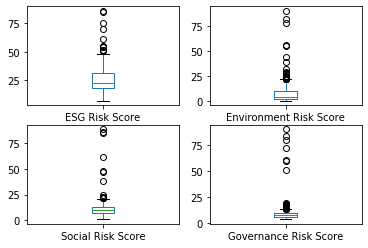

<Figure size 640x480 with 0 Axes>

In [9]:
from matplotlib.pyplot import figure

#Data Visualization to check distribution of data 
# box and whisker plots
ESG_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
figure(num=None, figsize=(8, 6), dpi=80)
pyplot.show()

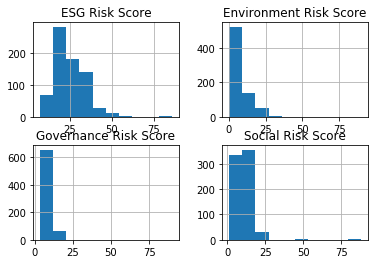

<Figure size 640x480 with 0 Axes>

In [10]:
#more visiulization of data
# histograms
ESG_data.hist()
figure(num=None, figsize=(8, 6), dpi=80)
pyplot.show()

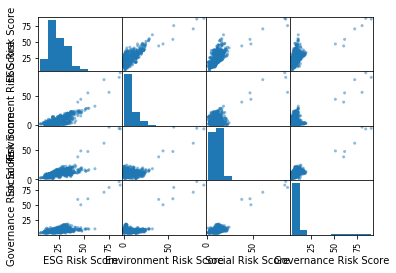

<Figure size 640x480 with 0 Axes>

In [11]:
#check interaction between veriables
# scatter plot matrix
scatter_matrix(ESG_data)
figure(num=None, figsize=(8, 6), dpi=80)
pyplot.show()

In [12]:
# Evaluate Algorithmes
#validate data
# Split-out validation dataset
array = ESG_data.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [13]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
ESG_datas = []
for ESG_data, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    ESG_datas.append(ESG_data)
    print('%s: %f (%f)' % (ESG_data, cv_results.mean(), cv_results.std()))

LR: 0.624938 (0.042530)
LDA: 0.731948 (0.037733)
KNN: 0.735926 (0.019707)
TREE: 0.814430 (0.056697)
RF: 0.822042 (0.033215)
NB: 0.661582 (0.037079)
SVM: 0.756264 (0.023556)


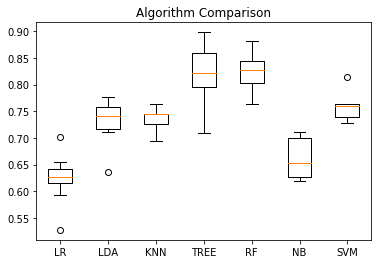

In [14]:
#check models for best selection
#Compare Algorithms
pyplot.boxplot(results, labels=ESG_datas)
pyplot.title('Algorithm Comparison')
pyplot.show()


# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(trainingScores)
# array([1, 3, 2, 0], dtype=int64)

In [15]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [16]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.696551724137931
[[20  0  2  0  6]
 [ 0 27  2  2  0]
 [ 0  3 45  0  0]
 [ 0 18  1  7  0]
 [ 7  0  3  0  2]]
              precision    recall  f1-score   support

        High       0.74      0.71      0.73        28
         Low       0.56      0.87      0.68        31
      Medium       0.85      0.94      0.89        48
  Negligible       0.78      0.27      0.40        26
      Severe       0.25      0.17      0.20        12

    accuracy                           0.70       145
   macro avg       0.64      0.59      0.58       145
weighted avg       0.70      0.70      0.67       145



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

X=[-1.07296862, -0.52817175], Predicted=1


In [ ]:
# import joblib
# filename = 'Rina_T.sav'
# joblib.dump(model, filename)